In [26]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [27]:
t = np.arange(0.1, 40, 0.1)

In [28]:
l = 0.25
f1 = np.zeros(len(t))
f2 = -(1-np.exp(-l*t)) / (l*t)
f3 = (1-np.exp(-l*t)) / (l*t) -np.exp(-l*t)

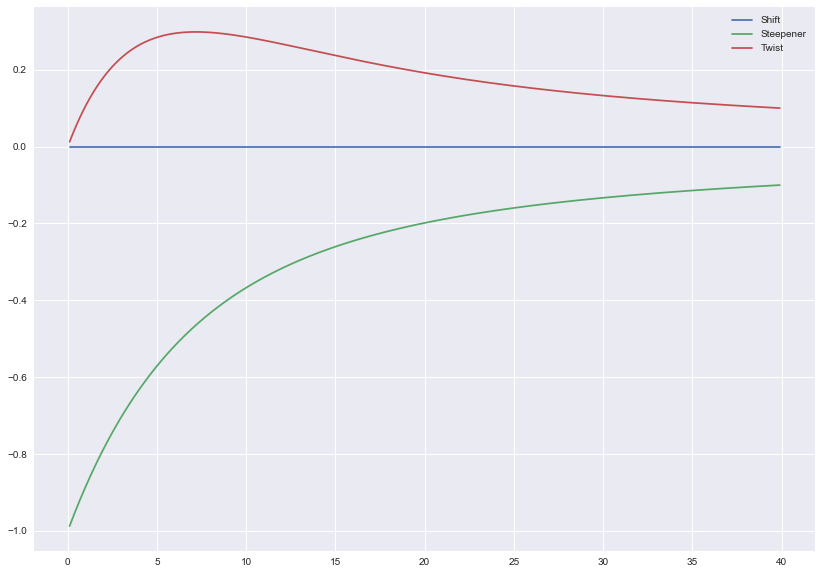

In [29]:
plt.figure(figsize = [14, 10])
plt.plot(t, f1, label='Shift')
plt.plot(t, f2, label='Steepener')
plt.plot(t, f3, label='Twist')
plt.legend()


In [30]:
df = pd.read_csv('GiltRates.csv').dropna()
df = df.set_index('Date')

In [31]:
l = 0.05

t = df.head(1).columns.to_numpy().astype('double')
yields = df.head(1).to_numpy().flatten()

f1 = np.ones(len(t))
f2 = -(1-np.exp(-l*t)) / (l*t)
f3 = (1-np.exp(-l*t)) / (l*t) -np.exp(-l*t)

ns = [f1,f2,f3]

Coefficients: 
 [-3.06192006 -3.20577417 13.86013069]


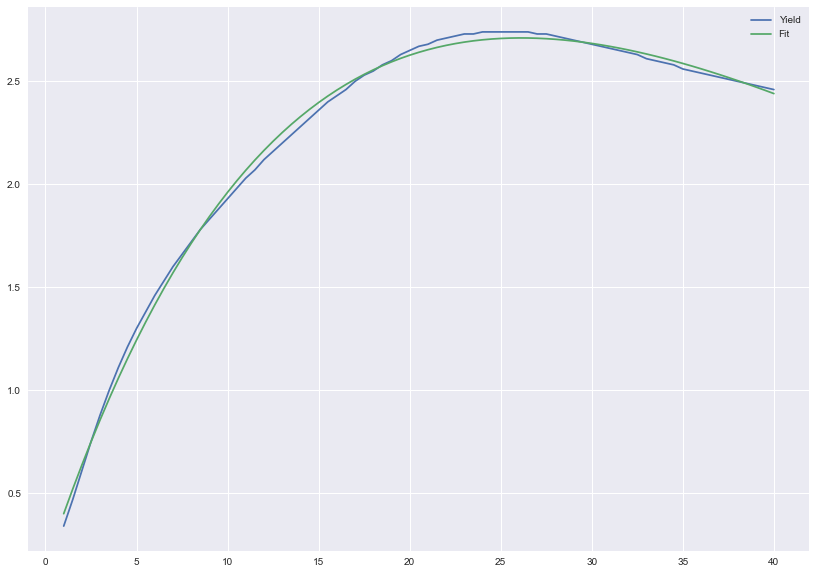

In [32]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit_intercept = False

# Train the model using the training sets
X_train = np.atleast_2d(ns).T
y_train = yields
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

# The coefficients
print("Coefficients: \n", regr.coef_)

plt.figure(figsize = [14, 10]) 
plt.plot(t, yields, label='Yield')
plt.plot(t, y_pred, label='Fit')
plt.legend()

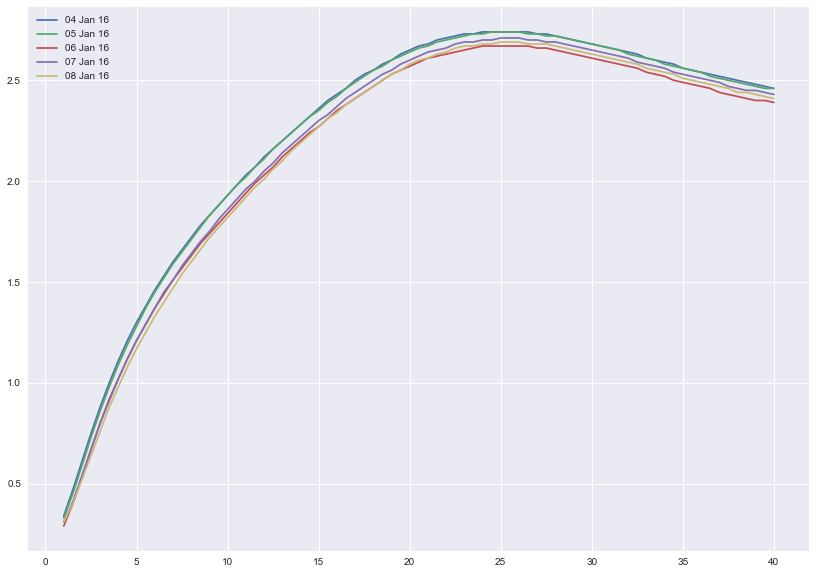

In [33]:
plt.figure(figsize = [14, 10]) 

for row in df.head(5).iterrows():
    
    yields = row[1].to_numpy()
    plt.plot(t, yields, label=row[0])

plt.legend()

In [34]:
l = 0.1
l2 = 0.5
l3 = 1.0

t = df.tail(1).columns.to_numpy().astype('double')
yields = df.tail(1).to_numpy().flatten()

f1 = np.ones(len(t))
f2 = -(1-np.exp(-l*t)) / (l*t)
f3 = (1-np.exp(-l*t)) / (l*t) -np.exp(-l*t)
f4 = (1-np.exp(-l2*t)) / (l2*t) -np.exp(-l2*t)
f5 = (1-np.exp(-l3*t)) / (l3*t) -np.exp(-l3*t)

ns = [f1,f2,f3,f4,f5]

Coefficients: 
 [ 1.00270827  0.50481224  6.72197496 -3.98135976  6.30997852]


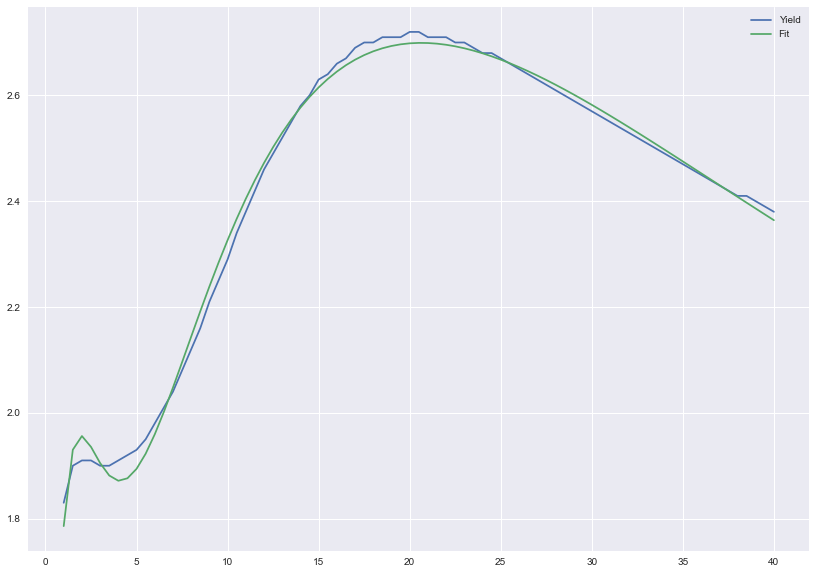

In [35]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit_intercept = False

# Train the model using the training sets
X_train = np.atleast_2d(ns).T
y_train = yields
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

# The coefficients
print("Coefficients: \n", regr.coef_)
coef = regr.coef_

plt.figure(figsize = [14, 10]) 
plt.plot(t, yields, label='Yield')
plt.plot(t, y_pred, label='Fit')
plt.legend()

In [36]:
list_coeff = []
for row in df.head(200).iterrows():
    y = row[1].to_numpy()
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit_intercept = False

    # Train the model using the training sets
    X_train = np.atleast_2d(ns).T
    y_train = y
    regr.fit(X_train, y_train)
    list_coeff.append(regr.coef_)

In [46]:
#changes in coeff
diff = np.diff(np.array(list_coeff).T)
cov = np.cov(diff)
mean = np.mean(diff, 1)

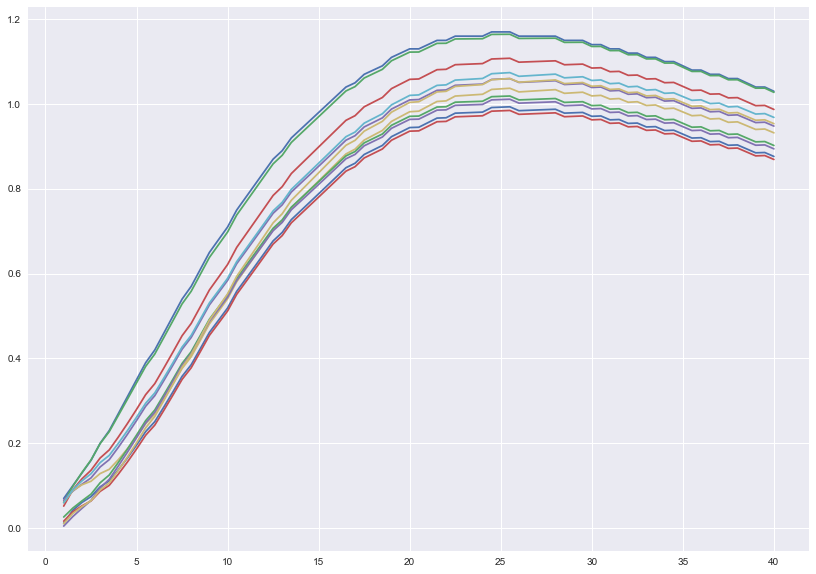

In [79]:
plt.figure(figsize = [14, 10]) 

t = df.head(1).columns.to_numpy().astype('double')
yields = df[1400:1401].to_numpy().flatten()

new_yields = yields
plt.plot(t, yields)

for _ in range(10):
    move = np.sum(ns * np.random.multivariate_normal(mean, cov, size=1, check_valid='warn', tol=1e-8).T, 0)
    new_yields += move
    plt.plot(t, new_yields)


In [66]:
df[100:101]

,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,...,35.5,36.0,36.5,37.0,37.5,38.0,38.5,39.0,39.5,40.0
Date,,,,,,,,,,,,,,,,,,,,,
26 May 16,0.32,0.33,0.39,0.47,0.55,0.64,0.72,0.8,0.88,0.96,...,2.16,2.15,2.14,2.12,2.11,2.1,2.09,2.08,2.07,2.06


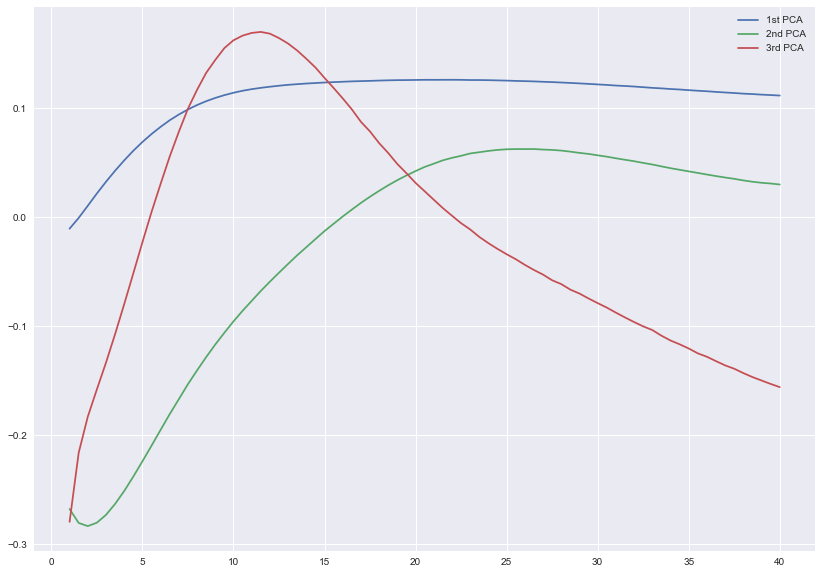

In [80]:
data = df.head(1000).to_numpy()
cov = np.cov(data.T)
svd_res = np.linalg.svd(cov)

plt.figure(figsize = [14, 10]) 
plt.plot(t, svd_res[2][0], label='1st PCA')
plt.plot(t, svd_res[2][1], label='2nd PCA')
plt.plot(t, svd_res[2][2], label='3rd PCA')
plt.legend()

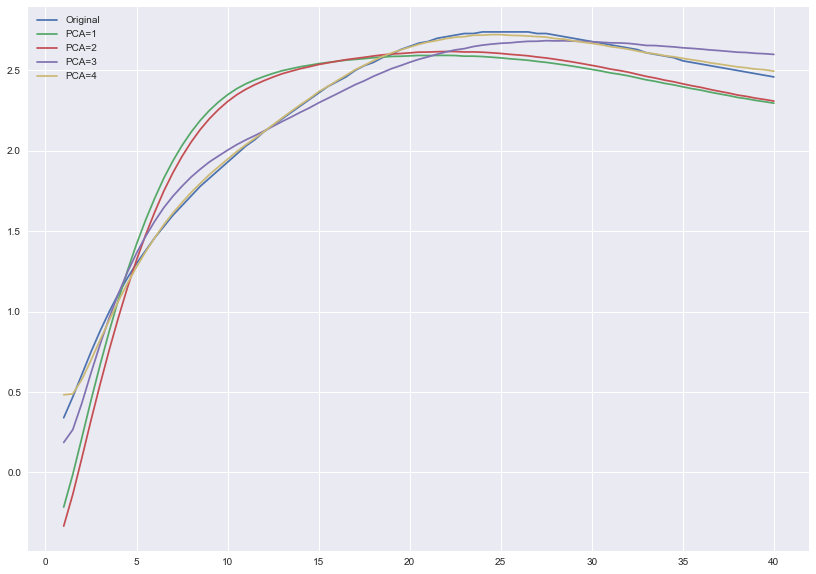

In [81]:
latent_dim = 5
disp_row = 1

plt.figure(figsize = [14, 10]) 
plt.plot(t, data[0:disp_row].T, label='Original')

for i in range(1,latent_dim):
    Z = np.matmul(svd_res[2][0:i], data[0:disp_row].T)
    proj = np.matmul(svd_res[2][0:i].T, Z)
    plt.plot(t, proj, label='PCA='+str(i))

plt.legend()

In [42]:
Z

array([[20.55132028],
       [ 0.44223029],
       [-1.86053295],
       [ 0.72713227]])

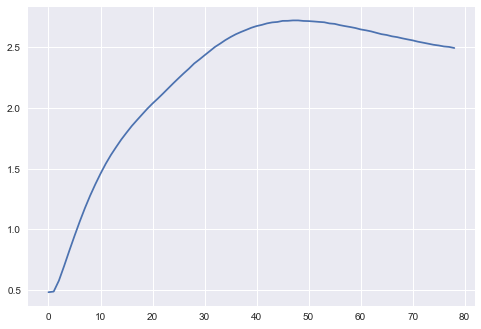

In [43]:
plt.plot(proj)

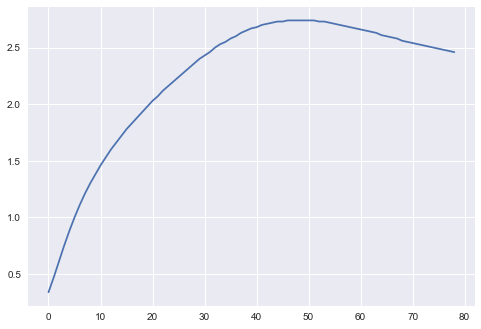

In [44]:
plt.plot(data[0:disp_row].T)